In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [246]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/symbols_valid_meta.csv')
df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [247]:
d = df[(df['Nasdaq Traded'].astype('str')=='Y') & (df['Symbol'].astype('str').str.startswith('NV'))]

In [248]:
d[d['Symbol']=='NVDA']

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
5160,Y,NVDA,NVIDIA Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,NVDA,N


In [249]:
df1 =  pd.read_csv('/kaggle/input/stock-market-dataset/stocks/NVDA.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [250]:
df1.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [251]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
df1[columns] = df1[columns].fillna(df1[columns].mean())

In [252]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [253]:
df1 = df1.drop_duplicates(inplace=False)

In [254]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [255]:
df1['year'] = pd.to_datetime(df1['Date']).dt.year
df1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0,1999
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0,1999
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0,1999


In [256]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

skewness_values = df1[columns].skew()

def classify_skewness(skewness):
    if -0.5 <= skewness <= 0.5:
        return "symmetrical"
    elif skewness < -0.5:
        return "left-skewed"
    elif skewness > 0.5:
        return "right-skewed"
    else:
        return "undefined"

for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: 2.1478 (right-skewed)
Skewness for 'High' column: 2.1481 (right-skewed)
Skewness for 'Low' column: 2.1493 (right-skewed)
Skewness for 'Close' column: 2.1487 (right-skewed)
Skewness for 'Adj Close' column: 2.1519 (right-skewed)


In [257]:
df1[columns] = np.log(df1[columns])
skewness_values = df1[columns].skew()
for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: 0.6373 (right-skewed)
Skewness for 'High' column: 0.6430 (right-skewed)
Skewness for 'Low' column: 0.6278 (right-skewed)
Skewness for 'Close' column: 0.6346 (right-skewed)
Skewness for 'Adj Close' column: 0.6604 (right-skewed)


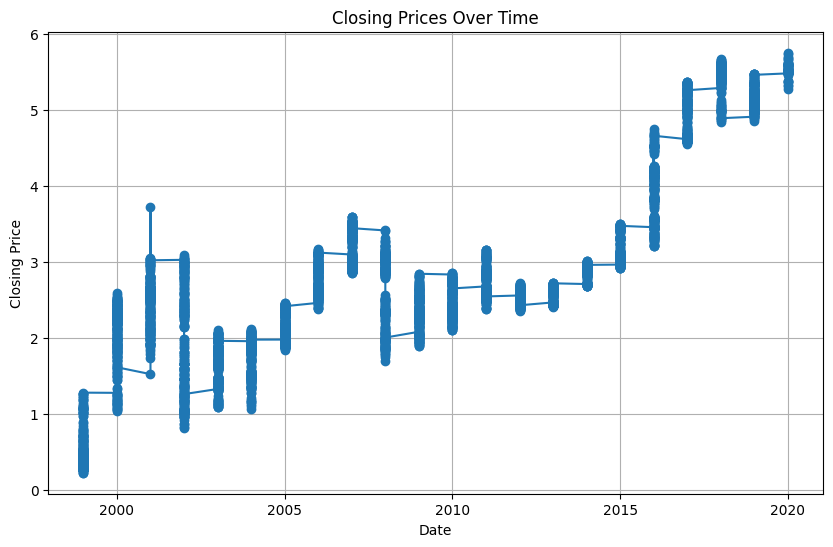

In [258]:
# Line Plot to identify trends
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['Adj Close'], marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [259]:
#!pip install mplfinance

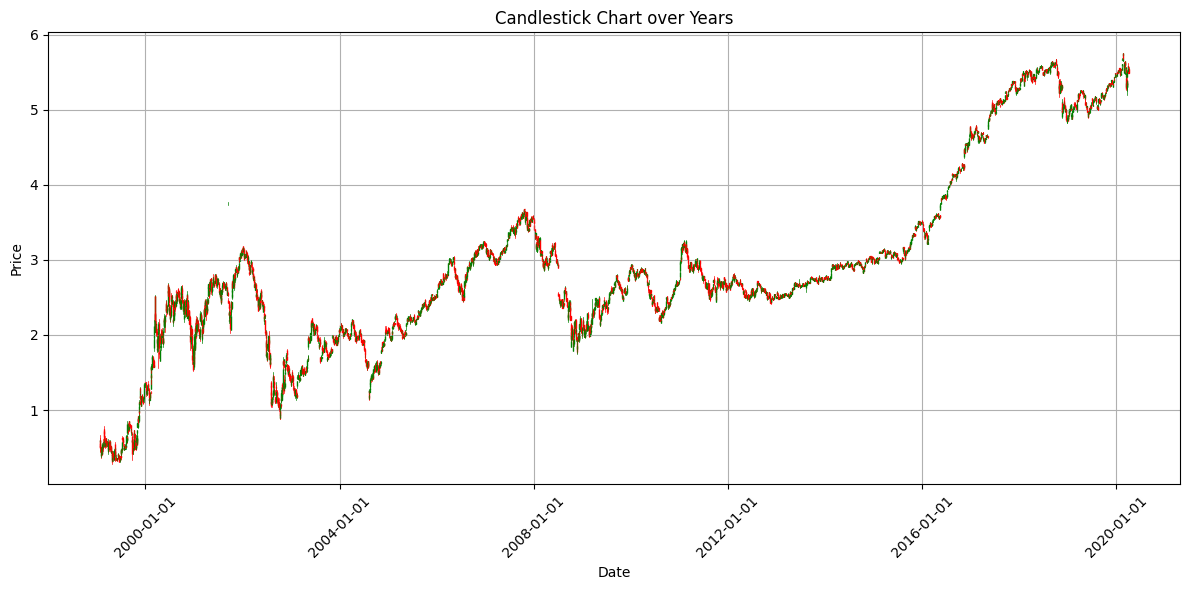

In [260]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date_num'] = mdates.date2num(df1['Date'])

ohlc_data = df1[['Date_num', 'Open', 'High', 'Low', 'Close']].copy()

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='g', colordown='r')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Candlestick Chart over Years')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [261]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
0,1999-01-22,0.559616,0.669431,0.439598,0.495077,0.412108,67867200.0,1999,10613.0
1,1999-01-25,0.571450,0.606136,0.495077,0.594707,0.511738,12762000.0,1999,10616.0
2,1999-01-26,0.606136,0.625827,0.498247,0.513946,0.430976,8580000.0,1999,10617.0
3,1999-01-27,0.517056,0.541597,0.459532,0.510826,0.427856,6109200.0,1999,10618.0
4,1999-01-28,0.510826,0.517056,0.501406,0.507696,0.424726,5688000.0,1999,10619.0


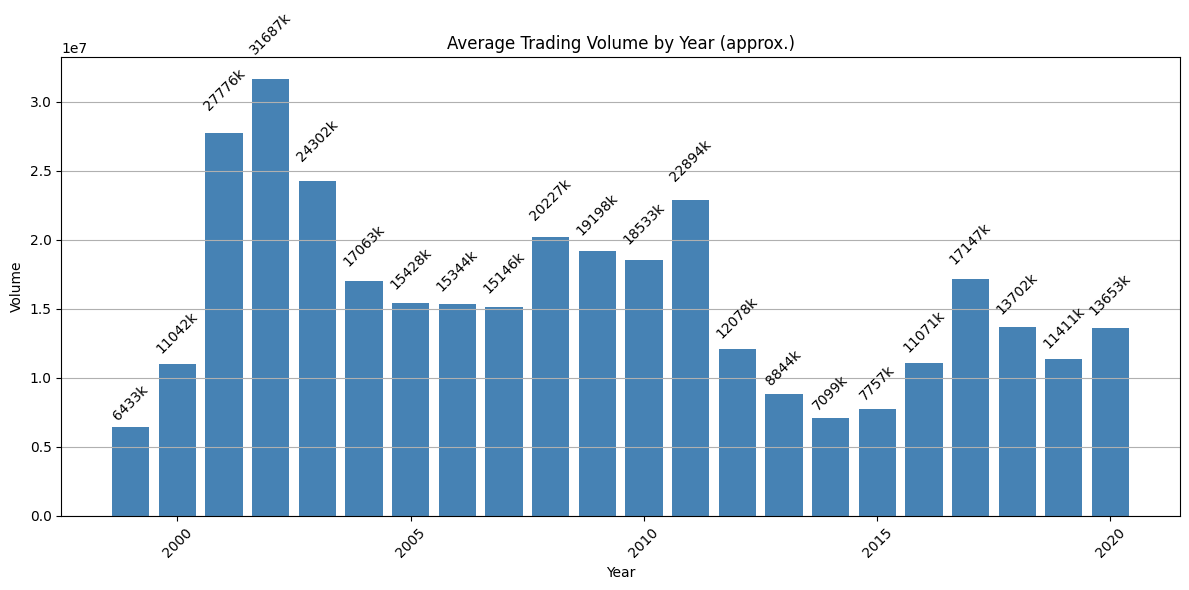

In [262]:
average_volume_by_year = df1.groupby('year')['Volume'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(average_volume_by_year['year'], average_volume_by_year['Volume'], color='steelblue')

def format_number(x):
    return f'{x/1e3:.0f}k'

# Adding average volume
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.05,  # Offset for text to be above the bar
             format_number(yval),  # Format the volume value
             ha='center', va='bottom', fontsize=10, rotation=45)

plt.title('Average Trading Volume by Year (approx.)')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [263]:
#!pip install plotly

In [264]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
0,1999-01-22,0.559616,0.669431,0.439598,0.495077,0.412108,67867200.0,1999,10613.0
1,1999-01-25,0.571450,0.606136,0.495077,0.594707,0.511738,12762000.0,1999,10616.0
2,1999-01-26,0.606136,0.625827,0.498247,0.513946,0.430976,8580000.0,1999,10617.0
3,1999-01-27,0.517056,0.541597,0.459532,0.510826,0.427856,6109200.0,1999,10618.0
4,1999-01-28,0.510826,0.517056,0.501406,0.507696,0.424726,5688000.0,1999,10619.0


In [265]:
#!pip install statsmodels

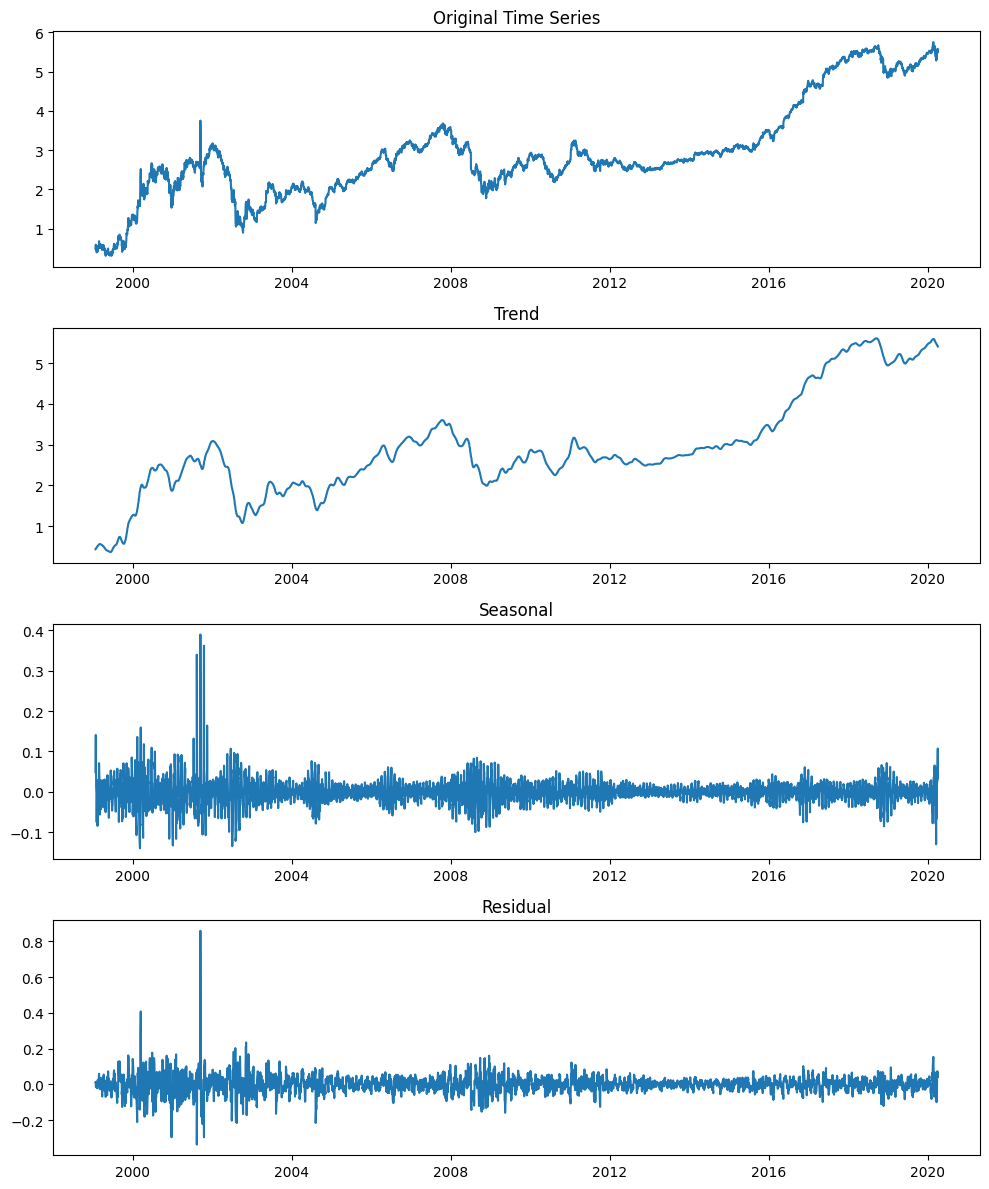

In [266]:
df1.set_index('Date', inplace=True)
df1.sort_index(inplace=True)

# Perform STL decomposition
stl = STL(df1['Close'], period=21)
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Original Time Series
ax1.plot(df1.index, df1['Close'])
ax1.set_title('Original Time Series')

# Trend component
ax2.plot(df1.index, result.trend)
ax2.set_title('Trend')

# Seasonal component
ax3.plot(df1.index, result.seasonal)
ax3.set_title('Seasonal')

# Residual component
ax4.plot(df1.index, result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

In [267]:
summary_stats = pd.concat([result.trend.describe(), result.seasonal.describe(), result.resid.describe()], axis=1)
summary_stats.columns = ['Trend', 'Seasonal', 'Residual']
print(summary_stats)

             Trend     Seasonal     Residual
count  5334.000000  5334.000000  5334.000000
mean      2.920368     0.000064     0.000066
std       1.194093     0.027895     0.046049
min       0.364779    -0.140481    -0.337264
25%       2.248470    -0.012466    -0.022192
50%       2.693867    -0.000396     0.000565
75%       3.175680     0.013474     0.023082
max       5.611312     0.390012     0.858918


In [268]:
#Augment Dickey Fuller test to check the stationarity
all_columns = df1.columns.tolist()
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
#print(numeric_columns)

for column in numeric_columns:
    print(f"\nPerforming ADF Test on {column}")
    result = adfuller(df1[column])

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

    if result[1] <= 0.05:
        print(f"The time series {column} is stationary")
    else:
        print(f"The time series {column} is non-stationary")


Performing ADF Test on Open
ADF Statistic: -1.0039282972281205
p-value: 0.7518288498666839
Critical Values:
	1%: -3.4315770163083275
	5%: -2.8620822159568418
	10%: -2.5670586209338344
The time series Open is non-stationary

Performing ADF Test on High
ADF Statistic: -0.9686347275791036
p-value: 0.7645315161301526
Critical Values:
	1%: -3.4315770163083275
	5%: -2.8620822159568418
	10%: -2.5670586209338344
The time series High is non-stationary

Performing ADF Test on Low
ADF Statistic: -1.096304839467617
p-value: 0.7165432405845691
Critical Values:
	1%: -3.4315770163083275
	5%: -2.8620822159568418
	10%: -2.5670586209338344
The time series Low is non-stationary

Performing ADF Test on Close
ADF Statistic: -1.0242306996323296
p-value: 0.744324449801261
Critical Values:
	1%: -3.4315795541205976
	5%: -2.8620833371789667
	10%: -2.567059217798964
The time series Close is non-stationary

Performing ADF Test on Adj Close
ADF Statistic: -0.9662978005254
p-value: 0.7653571365741005
Critical Valu

In [269]:
columns_to_analyze = [col for col in numeric_columns]
diff_df = pd.DataFrame()

print("\n\nAfter First-Order Differencing:")
for column in columns_to_analyze:
    diff_series = df1[column].diff().dropna()
    diff_df[f'Diff_{column}'] = diff_series
    print(f"\nADF Test for differenced {column}")
    result = adfuller(diff_series)

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print(f"The time series {column} is stationary")
    else:
        print(f"The time series {column} is non-stationary")



After First-Order Differencing:

ADF Test for differenced Open
ADF Statistic: -86.44383107824856
p-value: 0.0
The time series Open is stationary

ADF Test for differenced High
ADF Statistic: -78.90050708767221
p-value: 0.0
The time series High is stationary

ADF Test for differenced Low
ADF Statistic: -79.1696790317674
p-value: 0.0
The time series Low is stationary

ADF Test for differenced Close
ADF Statistic: -22.90146751168107
p-value: 0.0
The time series Close is stationary

ADF Test for differenced Adj Close
ADF Statistic: -22.931619686484016
p-value: 0.0
The time series Adj Close is stationary

ADF Test for differenced Volume
ADF Statistic: -21.98608274830856
p-value: 0.0
The time series Volume is stationary

ADF Test for differenced Date_num
ADF Statistic: -13.310720133424123
p-value: 6.755206635283285e-25
The time series Date_num is stationary


In [270]:
#diff_df = pd.DataFrame(diff_df)
diff_df.head()

,Diff_Open,Diff_High,Diff_Low,Diff_Close,Diff_Adj Close,Diff_Volume,Diff_Date_num
Date,,,,,,,
1999-01-25,0.011834,-0.063295,0.055479,0.099630,0.099630,-55105200.0,3.0
1999-01-26,0.034686,0.019691,0.003170,-0.080761,-0.080761,-4182000.0,1.0
1999-01-27,-0.089080,-0.084230,-0.038715,-0.003120,-0.003120,-2470800.0,1.0
1999-01-28,-0.006231,-0.024541,0.041874,-0.003130,-0.003130,-421200.0,1.0
1999-01-29,-0.003130,-0.006231,-0.041874,-0.048163,-0.048163,412800.0,1.0


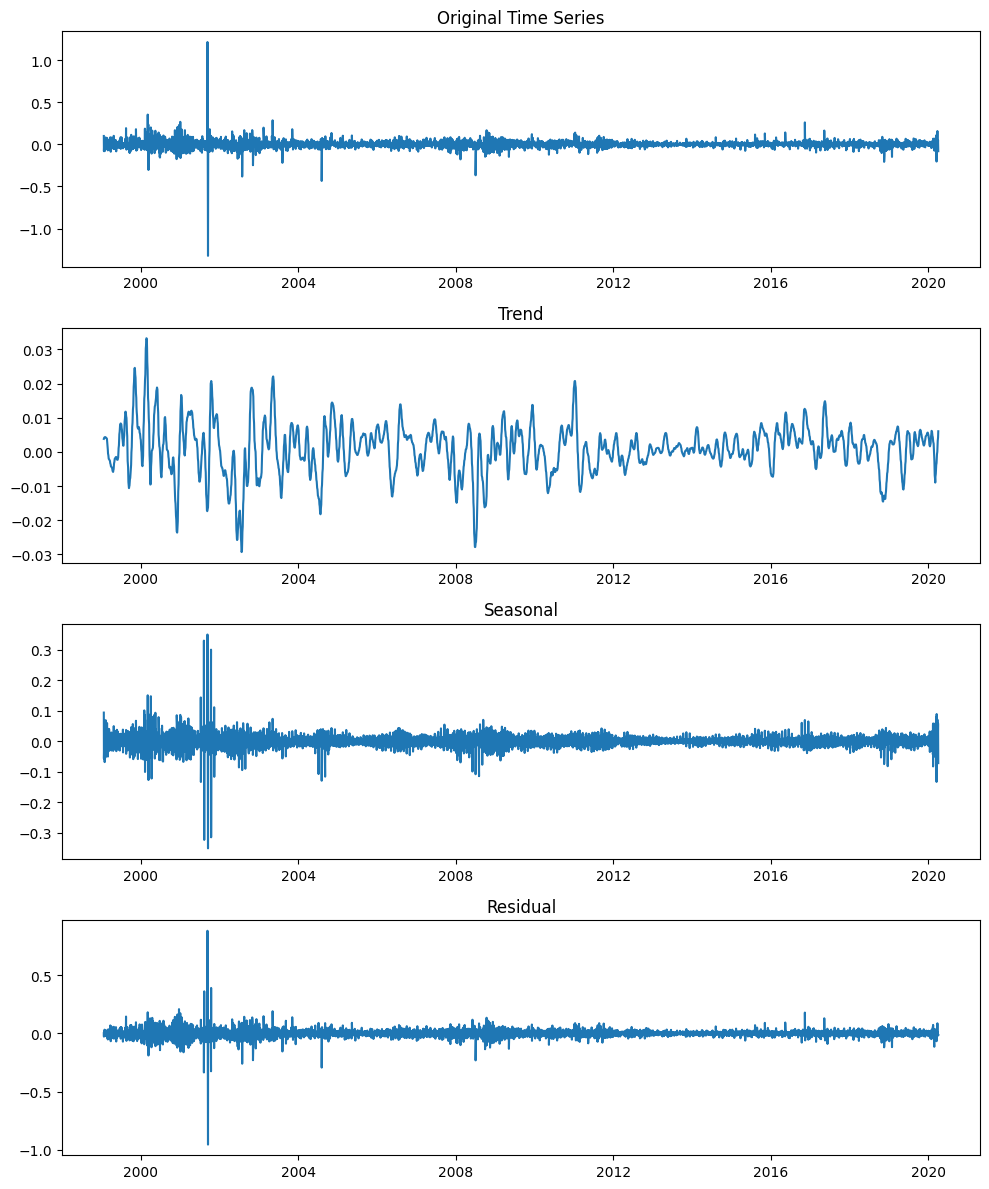

In [271]:
diff_df.sort_index(inplace=True)

# Perform STL decomposition
stl = STL(diff_df['Diff_Close'], period=21)
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Original Time Series
ax1.plot(diff_df.index, diff_df['Diff_Close'])
ax1.set_title('Original Time Series')

# Trend component
ax2.plot(diff_df.index, result.trend)
ax2.set_title('Trend')

# Seasonal component
ax3.plot(diff_df.index, result.seasonal)
ax3.set_title('Seasonal')

# Residual component
ax4.plot(diff_df.index, result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

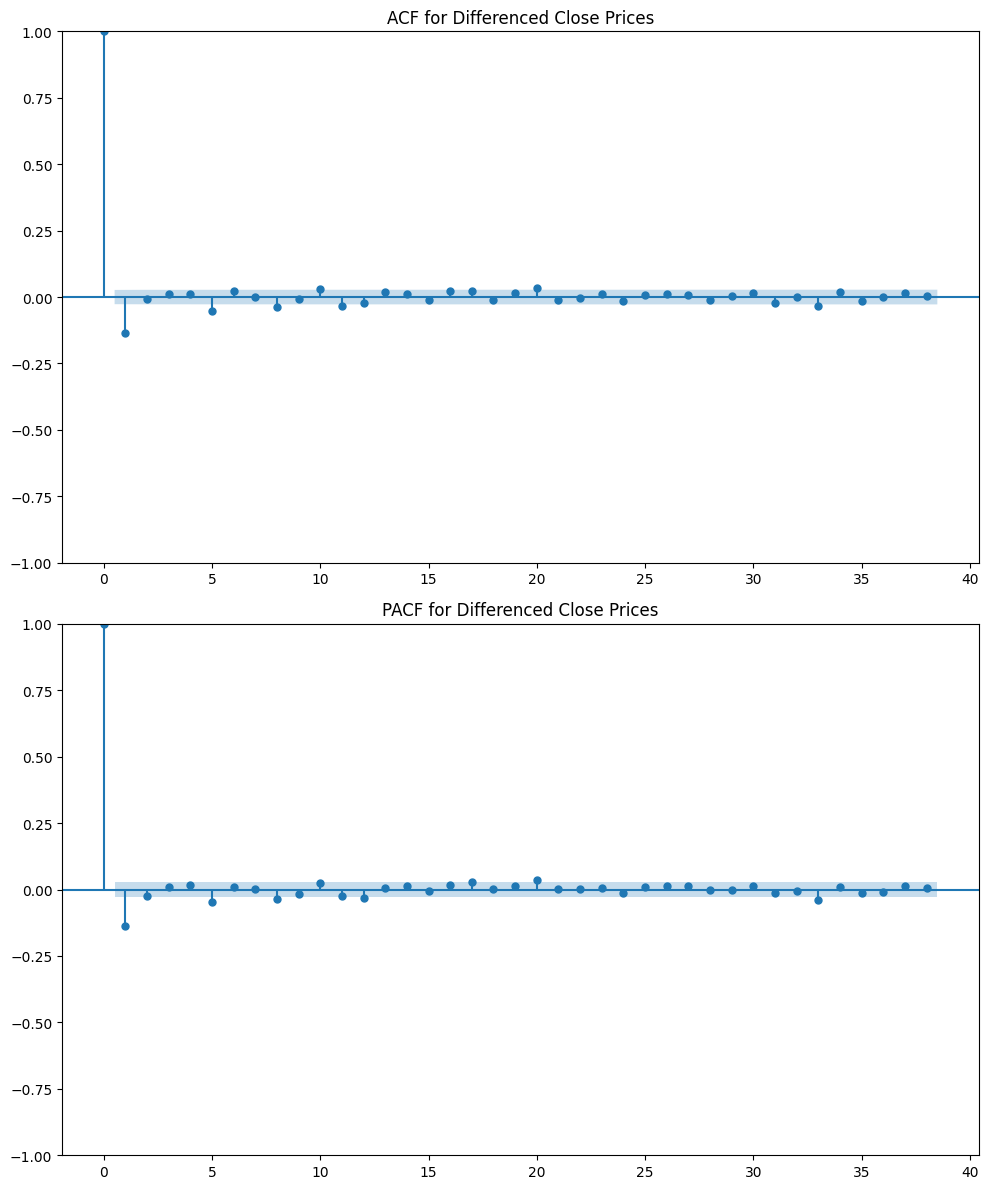

In [272]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot ACF
plot_acf(diff_df['Diff_Close'].dropna(), ax=ax1)
ax1.set_title('ACF for Differenced Close Prices')

# Plot PACF
plot_pacf(diff_df['Diff_Close'].dropna(), ax=ax2)
ax2.set_title('PACF for Differenced Close Prices')

plt.tight_layout()
plt.show()